In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
t_simb = 100; #symbol period
r_simb = 1/t_simb; print('Baud (Symbol) Rate:',r_simb)
t = np.arange(-10*t_simb, 10*t_simb+1)

g_t = np.sinc(t/t_simb)
g_t = g_t/np.sqrt(sum(pow(g_t,2)))

Baud (Symbol) Rate: 0.01


In [3]:
import random
A = [-3, -1, 1, 3] #alphabet

bits = math.log2(len(A)); print('Bits:',int(bits))
r_bit = r_simb*bits; print('Bit Rate:',r_bit,'Hz')

a = np.zeros(10)
simb = np.zeros(1000)

for k in range(len(a)):
    a[k] = random.choice(A)
    simb[k*t_simb] = a[k]


Bits: 2
Bit Rate: 0.02 Hz


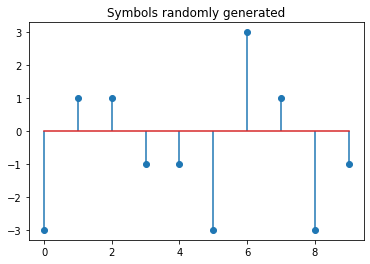

In [4]:
plt.figure()
plt.stem(simb[:1000:100], use_line_collection="True")
plt.title('Symbols randomly generated')
plt.show()

In [5]:
simb[:1000:100]

array([-3.,  1.,  1., -1., -1., -3.,  3.,  1., -3., -1.])

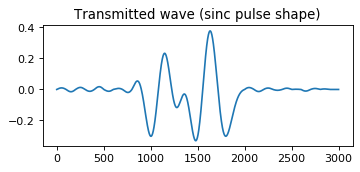

In [6]:
plt.figure(num=None, figsize=(5, 2), dpi=80, facecolor='w', edgecolor='k')
signal = np.convolve(simb, g_t)
plt.title('Transmitted wave (sinc pulse shape)')
plt.plot(signal)
plt.show()

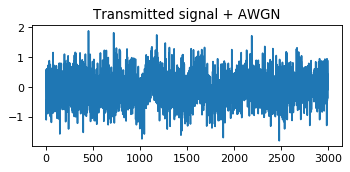

In [7]:
noise = .5*np.random.normal(0,1,len(signal)) # AWGN u = 0, var = 1
r_t = signal + noise

plt.figure(num=None, figsize=(5, 2), dpi=80, facecolor='w', edgecolor='k')

plt.title('Transmitted signal + AWGN')
plt.plot(r_t)
plt.show()


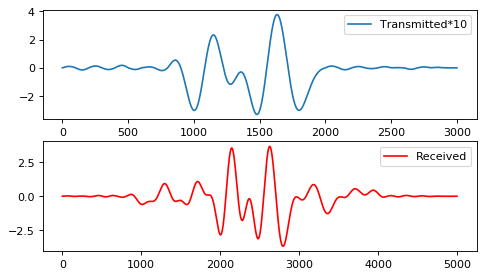

In [8]:
y = np.convolve(r_t, g_t)
sim_hat = y[2000:3000:100]

plt.figure(num=None, figsize=(7,4), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(2,1,1)
plt.plot(signal*10)
plt.legend(('Transmitted*10',))

plt.subplot(2,1,2)
plt.plot(y, 'red')
plt.legend(('Received',))
plt.show()

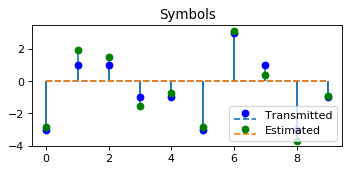

In [9]:
plt.figure(num=None, figsize=(5,2), dpi=80, facecolor='w', edgecolor='k')
plt.stem(simb[:1000:100], markerfmt='bo', basefmt="--", use_line_collection="True")
plt.stem(y[2000:3000:100], markerfmt='go', basefmt="--", use_line_collection="True")
plt.legend(('Transmitted', 'Estimated'))
plt.title('Symbols')
plt.show()

In [10]:
import matplotlib as mpl
print (mpl.get_cachedir())

/home/alunos/samuelbf/.matplotlib


In [11]:
# Raised cosine
def rcosine(alpha, t, t_simb):
    pulse = []
    for x in t:
        pulse.append((np.sinc(x/t_simb))*(math.cos(alpha*math.pi*x/t_simb)/(1-(2*alpha*x/t_simb)**2)))
    return pulse

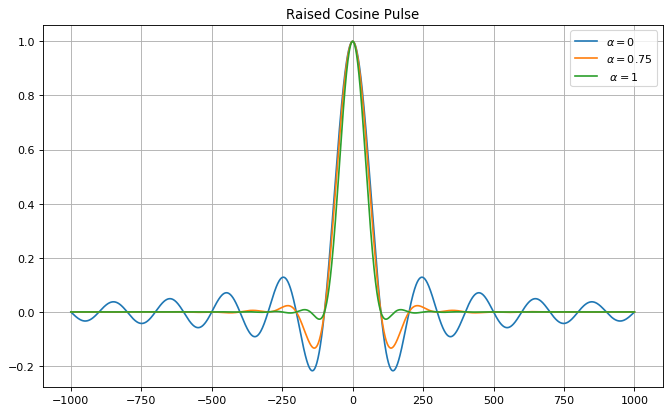

In [12]:
plt.figure(figsize=(10,6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(t, rcosine(0, t, t_simb))
plt.plot(t, rcosine(0.500001, t, t_simb))
plt.plot(t, rcosine(.99999, t, t_simb))
plt.grid(True)
plt.title('Raised Cosine Pulse')
plt.legend(('$\\alpha = 0$','$\\alpha = 0.75$',' $\\alpha = 1$'))
plt.show()

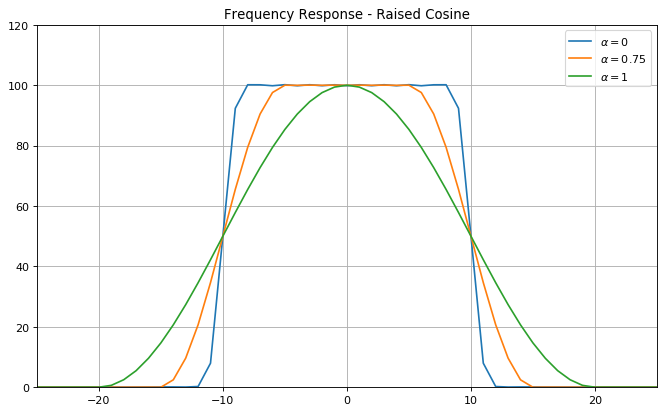

In [13]:
plt.figure(figsize=(10,6), dpi=80, facecolor='w', edgecolor='k')
#test2 = np.sinc(t/t_simb) * np.hamming(2001)
rcosine_pulse = rcosine(0, t, t_simb) *np.hamming(2001)
rcosine_pulse2 = rcosine(0.500001, t, t_simb) #*np.hamming(2001)
rcosine_pulse3 = rcosine(.999999, t, t_simb) #*np.hamming(2001)

fft = abs(np.fft.fftshift(np.fft.fft(rcosine_pulse)))#/len(rcosine_pulse)
fft2 = abs(np.fft.fftshift(np.fft.fft(rcosine_pulse2)))#/len(rcosine_pulse)
fft3 = abs(np.fft.fftshift(np.fft.fft(rcosine_pulse3)))#/len(rcosine_pulse)

plt.title('Frequency Response - Raised Cosine')
plt.plot(t, fft)
plt.plot(t, fft2)
plt.plot(t, fft3)
plt.axis([-25, 25, 0, 120])
plt.legend(('$\\alpha=0$','$\\alpha=0.75$','$\\alpha=1$'))
plt.grid(True)